In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("/content/Titanic-Dataset.csv")

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()     # For data types and missing values
df.isnull().sum()  # To count missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
# Fill missing 'Age' with median (or use age group bins later)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill 'Embarked' with mode (most common port)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Optionally drop 'Cabin' due to too many missing values
df.drop('Cabin', axis=1, inplace=True)


/tmp/ipython-input-10-733143390.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


2. Create Histograms and Boxplots for Numeric Features

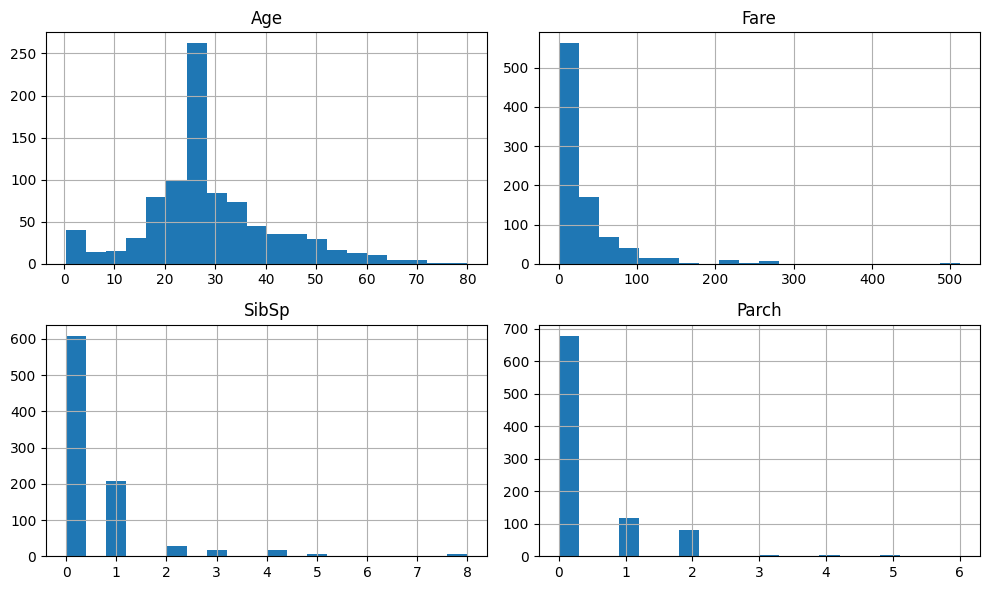

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=20, figsize=(10,6))
plt.tight_layout()
plt.show()


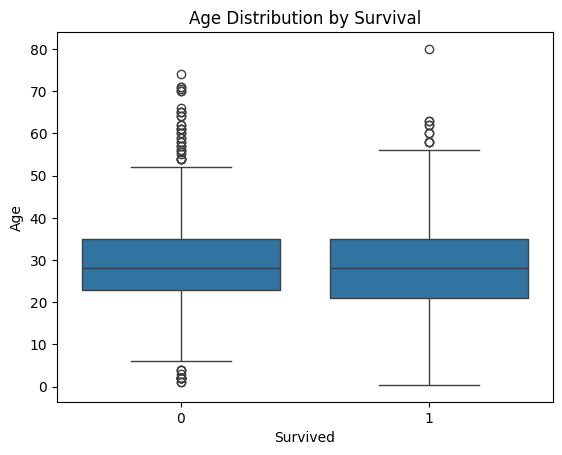

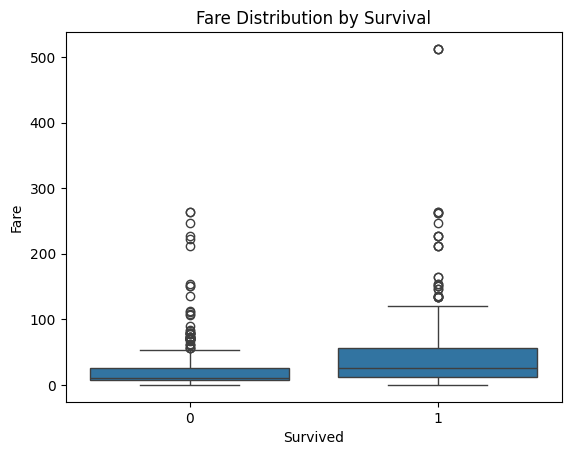

In [12]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()


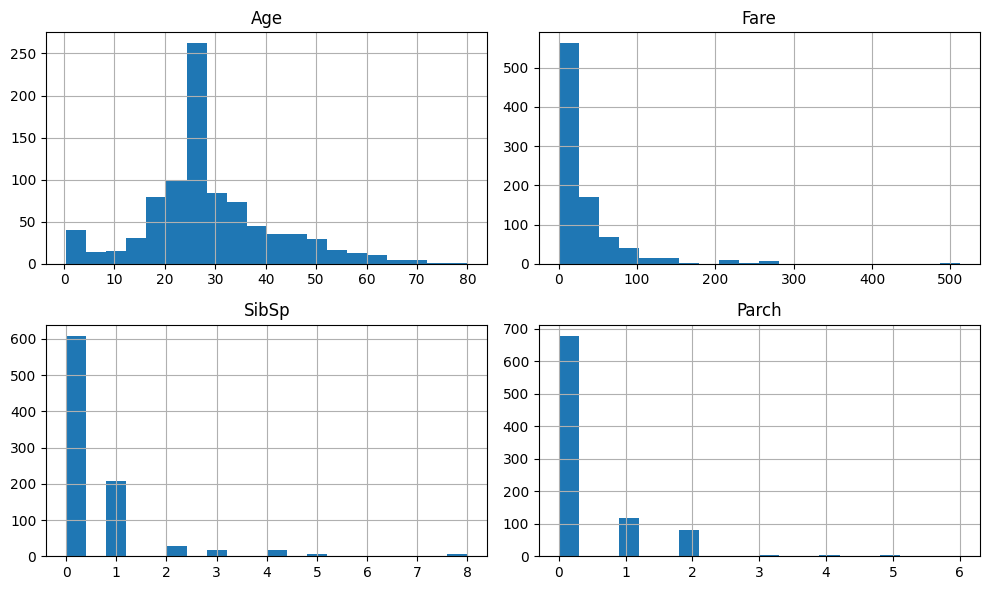

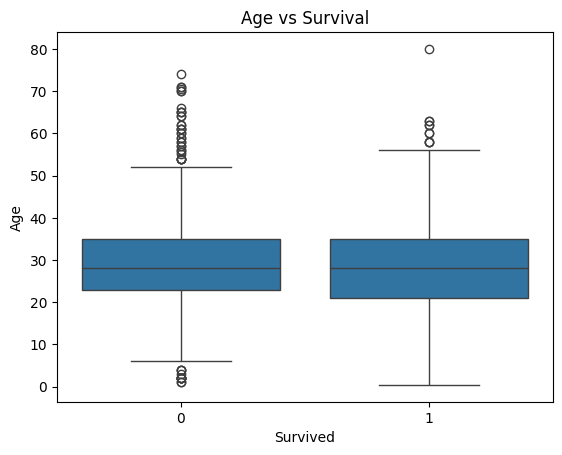

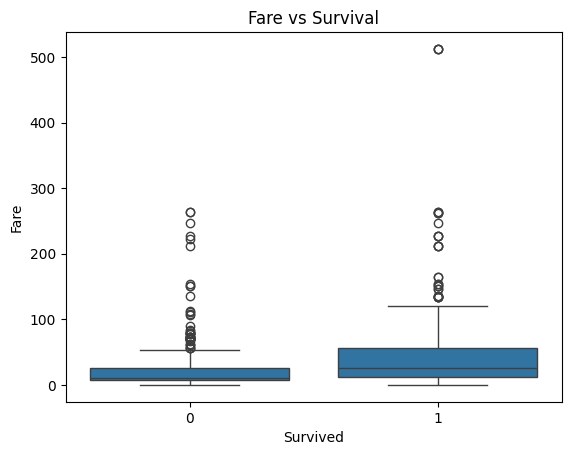

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Boxplots
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()


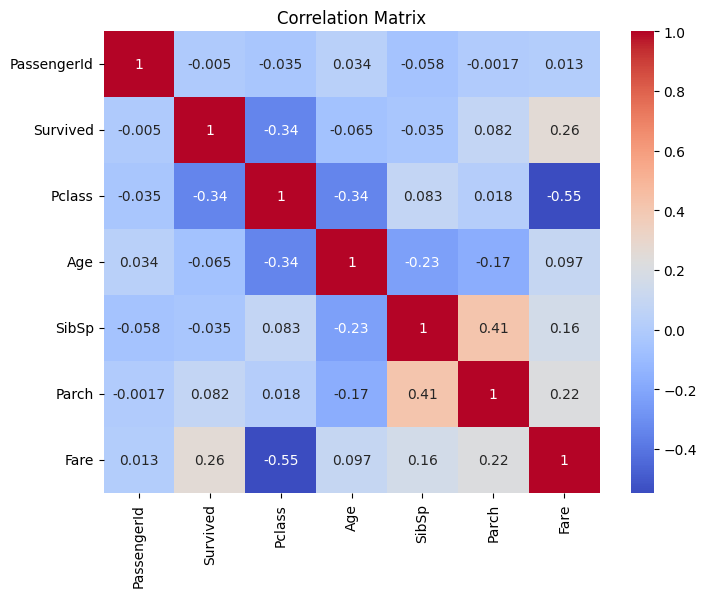

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


<Axes: xlabel='Sex', ylabel='Survived'>

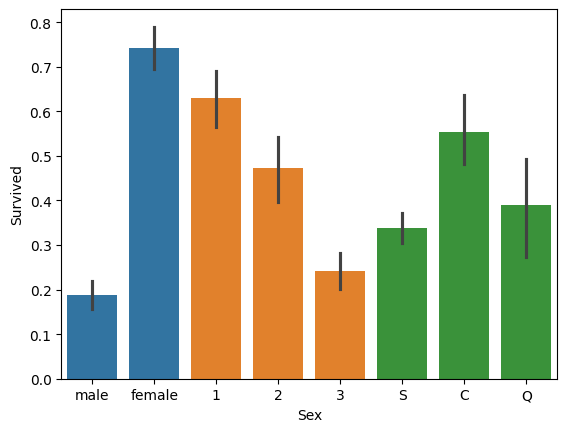

In [15]:
# Sex vs Survival
sns.barplot(x='Sex', y='Survived', data=df)

# Pclass vs Survival
sns.barplot(x='Pclass', y='Survived', data=df)

# Embarked vs Survival
sns.barplot(x='Embarked', y='Survived', data=df)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Don'),
  Text(5, 0, 'Rev'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'Mme'),
  Text(8, 0, 'Ms'),
  Text(9, 0, 'Major'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Sir'),
  Text(12, 0, 'Mlle'),
  Text(13, 0, 'Col'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'Countess'),
  Text(16, 0, 'Jonkheer')])

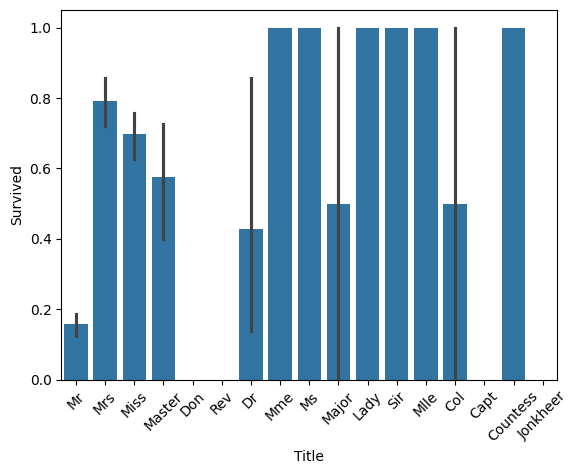

In [16]:
# Extract title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Plot survival by Title
sns.barplot(x='Title', y='Survived', data=df)
plt.xticks(rotation=45)
